In [2]:
import pandas as pd
import numpy as np

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
data_path = 'C:\\Users\\``Emmanuel Oguntomi\\Desktop\\Churn_Modelling.csv'

In [25]:
data = pd.read_csv(data_path)

In [20]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
# shows the shape of the data. other details includes (dimension, data_type, and data_size) 
data.shape, data.ndim, data.size

((10000, 14), 2, 140000)

# Exploratory Data Analysis - EDA

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [24]:
data.describe([0.1,0.25,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,50%,65%,75%,90%,95%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,1000.90,2500.75,5.000500e+03,6.500350e+03,7.500250e+03,9.000100e+03,9.500050e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15591167.10,15628528.25,1.569074e+07,1.572770e+07,1.575323e+07,1.579083e+07,1.580303e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,521.00,584.00,6.520000e+02,6.900000e+02,7.180000e+02,7.780000e+02,8.120000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,27.00,32.00,3.700000e+01,4.100000e+01,4.400000e+01,5.300000e+01,6.000000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,1.00,3.00,5.000000e+00,7.000000e+00,7.000000e+00,9.000000e+00,9.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,0.00,9.719854e+04,1.162229e+05,1.276442e+05,1.492448e+05,1.627117e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,20273.58,51002.11,1.001939e+05,1.295816e+05,1.493882e+05,1.796747e+05,1.901554e+05,199992.48


In [25]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

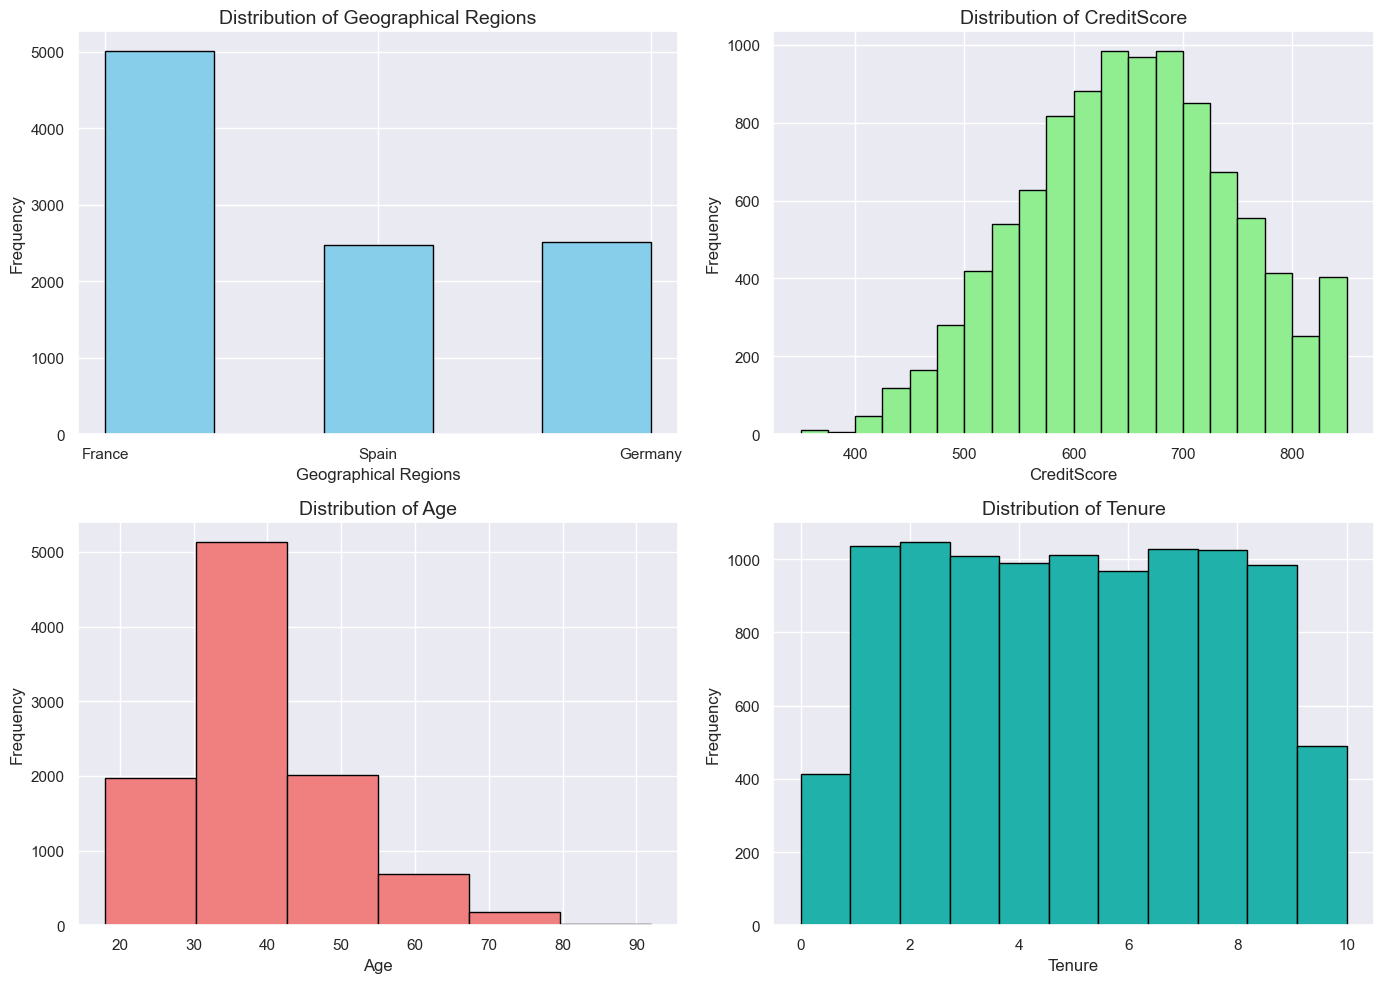

In [26]:
# Plot distribution of numerical columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Geography
axes[0, 0].hist(data['Geography'].dropna(), bins=5, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Geographical Regions', fontsize=14)
axes[0, 0].set_xlabel('Geographical Regions', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Distribution of CreditScore
axes[0, 1].hist(data['CreditScore'].dropna(), bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of CreditScore', fontsize=14)
axes[0, 1].set_xlabel('CreditScore', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Distribution of Age
axes[1, 0].hist(data['Age'].dropna(), bins=6, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of Age', fontsize=14)
axes[1, 0].set_xlabel('Age', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Distribution of Tenure
axes[1, 1].hist(data['Tenure'], bins=11, color='lightseagreen', edgecolor='black')
axes[1, 1].set_title('Distribution of Tenure', fontsize=14)
axes[1, 1].set_xlabel('Tenure', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

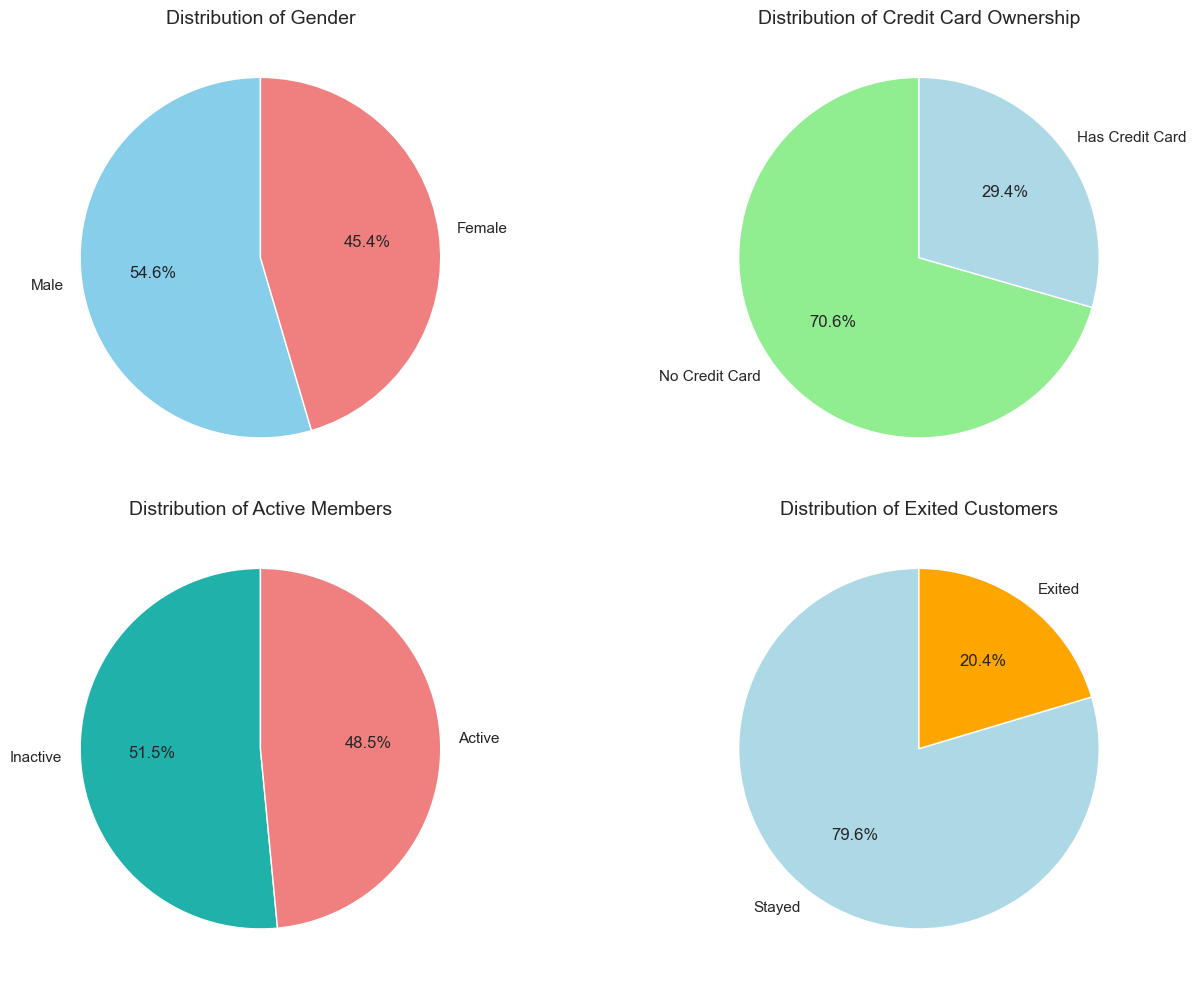

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Pie chart for Gender
gender_counts = data['Gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
axes[0, 0].set_title('Distribution of Gender', fontsize=14)

# Pie chart for HasCrCard
crcard_counts = data['HasCrCard'].value_counts()
axes[0, 1].pie(crcard_counts, labels=['No Credit Card', 'Has Credit Card'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue'], startangle=90)
axes[0, 1].set_title('Distribution of Credit Card Ownership', fontsize=14)

# Pie chart for IsActiveMember
active_counts = data['IsActiveMember'].value_counts()
axes[1, 0].pie(active_counts, labels=['Inactive', 'Active'], autopct='%1.1f%%', colors=['lightseagreen', 'lightcoral'], startangle=90)
axes[1, 0].set_title('Distribution of Active Members', fontsize=14)

# Pie chart for Exited
exited_counts = data['Exited'].value_counts()
axes[1, 1].pie(exited_counts, labels=['Stayed', 'Exited'], autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
axes[1, 1].set_title('Distribution of Exited Customers', fontsize=14)

plt.tight_layout()
plt.show()


In [28]:
# Drop irrelevant columns for the model
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [29]:
# Select 10 random rows from the dataset
validation_set = data.sample(n=10, random_state=42)

# Save the selected rows to a CSV file
validation_set.to_csv('validation_set.csv', index=False)

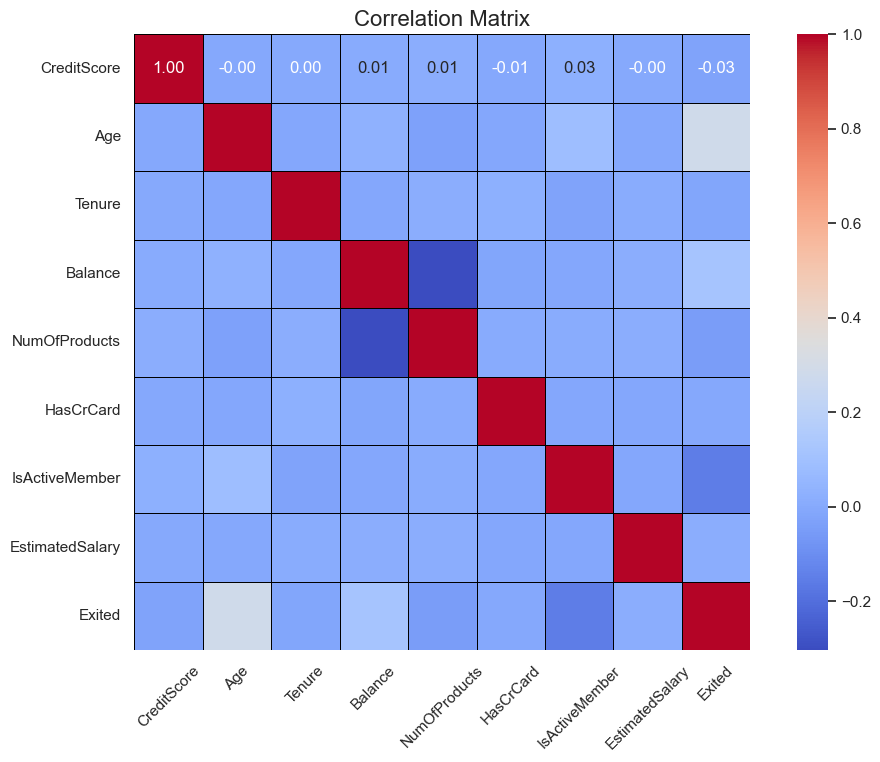

In [30]:
# Calculate the correlation matrix only for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_cols].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
            linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Data cleaning and Preprocessing for Machine Learning

In [31]:
# Check columns list and missing values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
import missingno as msno

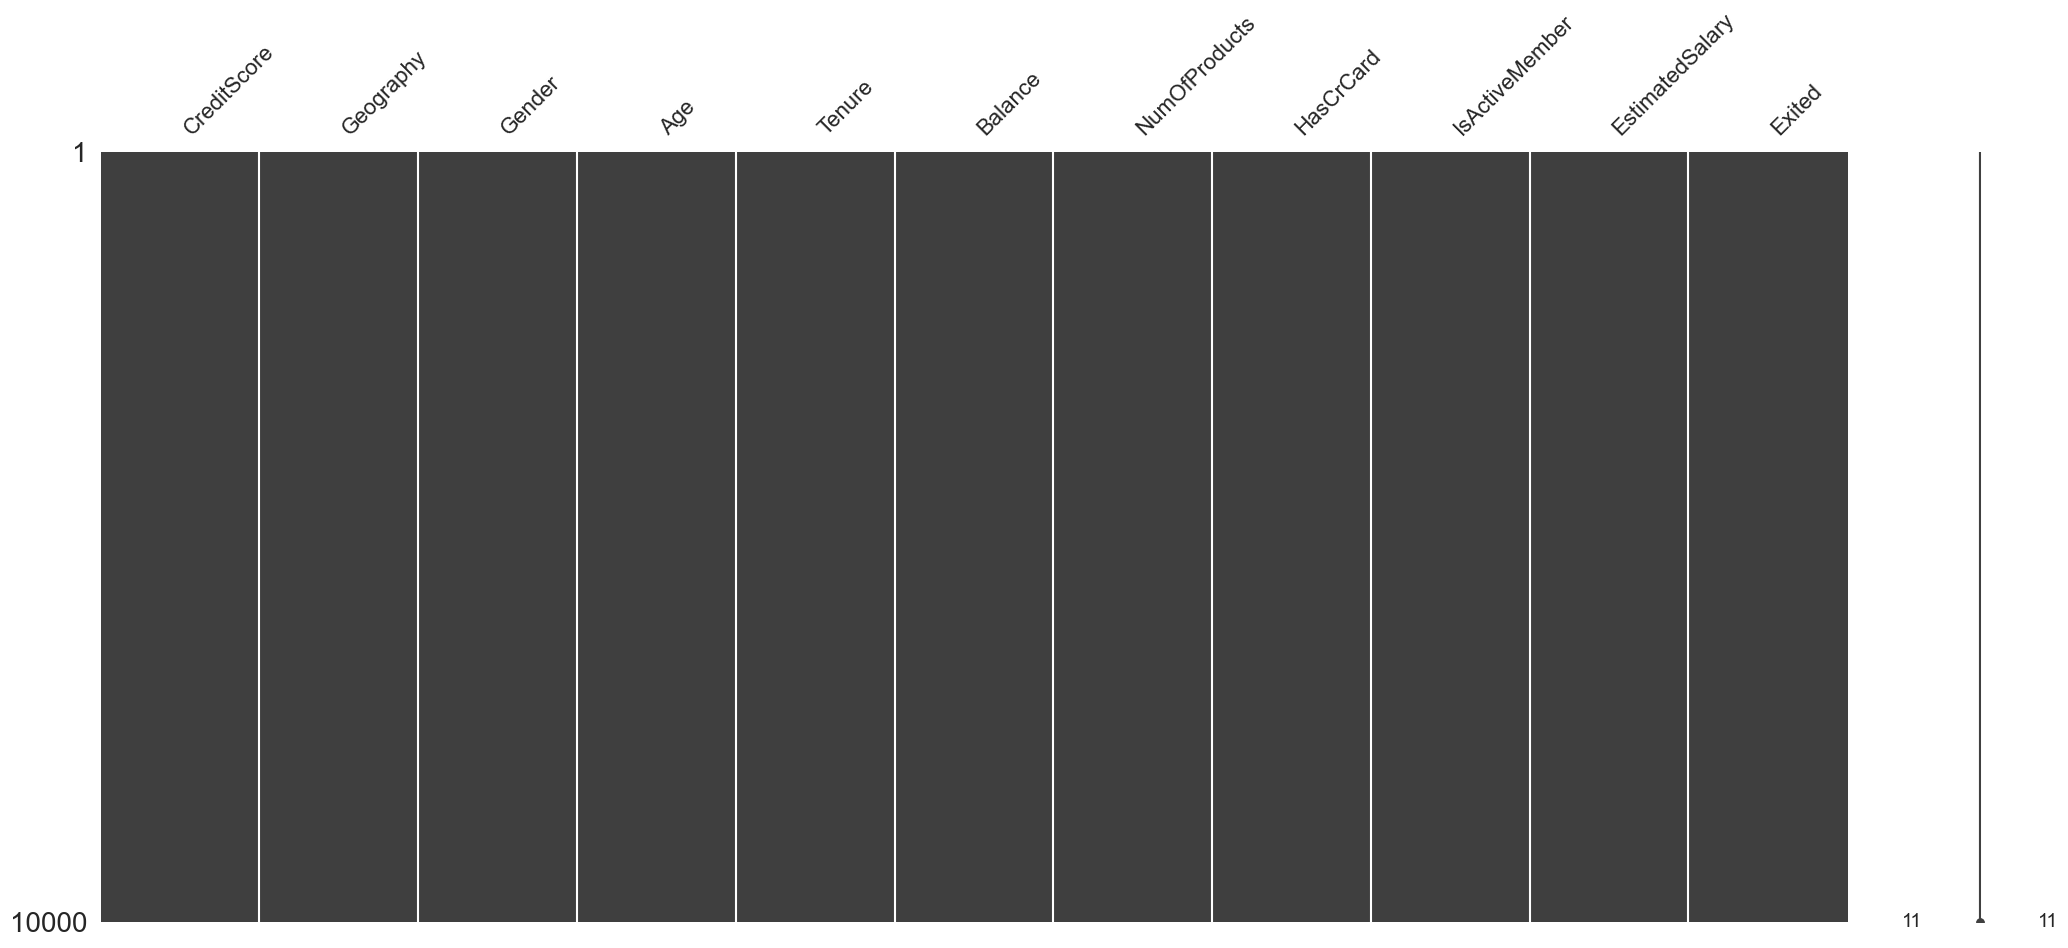

In [33]:
msno.matrix(data);

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Encoding Categorical Variables

In [26]:
# Perform One-Hot Encoding on 'Geography'
data_encoded = pd.get_dummies(data, columns=['Geography'])

In [27]:
# Convert 'Gender' to numeric using Label Encoding (1 for Male, 0 for Female)
data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 1, 'Female': 0})
data_encoded['Geography_Germany'] = data_encoded['Geography_Germany'].map({True: 1, False: 0})
data_encoded['Geography_Spain'] = data_encoded['Geography_Spain'].map({True: 1, False: 0})
data_encoded['Geography_France'] = data_encoded['Geography_France'].map({True: 1, False: 0})

In [28]:
# Display the first few rows to verify the changes
data_encoded.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,6,15574012,Chu,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,7,15592531,Bartlett,822,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,8,15656148,Obinna,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,9,15792365,He,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,10,15592389,H?,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


## Creating Interaction Features

In [29]:
# Create interaction features
# Interaction between 'Age' and 'CreditScore'
data_encoded['Age_CreditScore_Interaction'] = data_encoded['Age'] * data_encoded['CreditScore']

# Interaction between 'Balance' and 'NumOfProducts'
data_encoded['Balance_NumOfProducts_Interaction'] = data_encoded['Balance'] * data_encoded['NumOfProducts']

# Display the first few rows to verify the changes
data_encoded[['Age_CreditScore_Interaction', 'Balance_NumOfProducts_Interaction']].head(10)

,Age_CreditScore_Interaction,Balance_NumOfProducts_Interaction
0,25998,0.00
1,24928,83807.86
2,21084,478982.40
3,27261,0.00
4,36550,125510.82
5,28380,227511.56
6,41100,0.00
7,10904,460186.96
8,22044,284102.14
9,18468,134603.88


In [30]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to scale
numeric_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Age_CreditScore_Interaction', 'Balance_NumOfProducts_Interaction']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric features in the dataset
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

In [31]:
# Display the first few rows to verify the scaling
print(data_encoded[numeric_features].head())

   CreditScore       Age   Balance  EstimatedSalary  \
0    -0.326221  0.293517 -1.225848         0.021886   
1    -0.440036  0.198164  0.117350         0.216534   
2    -1.536794  0.293517  1.333053         0.240687   
3     0.501521  0.007457 -1.225848        -0.108918   
4     2.063884  0.388871  0.785728        -0.365276   

   Age_CreditScore_Interaction  Balance_NumOfProducts_Interaction  
0                     0.086709                          -1.022336  
1                    -0.049277                          -0.214036  
2                    -0.537811                           3.597297  
3                     0.247224                          -1.022336  
4                     1.427762                           0.188176  


In [32]:
data_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Age_CreditScore_Interaction,Balance_NumOfProducts_Interaction
0,1,15634602,Hargrave,-0.326221,0,0.293517,2,-1.225848,1,1,1,0.021886,1,1,0,0,0.086709,-1.022336
1,2,15647311,Hill,-0.440036,0,0.198164,1,0.117350,1,0,1,0.216534,0,0,0,1,-0.049277,-0.214036
2,3,15619304,Onio,-1.536794,0,0.293517,8,1.333053,3,1,0,0.240687,1,1,0,0,-0.537811,3.597297
3,4,15701354,Boni,0.501521,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,1,0,0,0.247224,-1.022336
4,5,15737888,Mitchell,2.063884,0,0.388871,2,0.785728,1,1,1,-0.365276,0,0,0,1,1.427762,0.188176


In [33]:
data = data_encoded

In [34]:
# 1. Save the DataFrame as a CSV file
csv_file_path = 'C:\\Users\\``Emmanuel Oguntomi\\Desktop\\output_data.csv'
data.to_csv(csv_file_path, index=False)  # Set index=False to avoid saving the index as a separate column
print(f'Data saved to CSV: {csv_file_path}')

# 2. Save the DataFrame as a JSON file
json_file_path = 'C:\\Users\\``Emmanuel Oguntomi\\Desktop\\output_data.json'
data.to_json(json_file_path, orient='records', indent=4)  # 'records' makes each row a dictionary
print(f'Data saved to JSON: {json_file_path}')

Data saved to CSV: C:\Users\``Emmanuel Oguntomi\Desktop\output_data.csv
Data saved to JSON: C:\Users\``Emmanuel Oguntomi\Desktop\output_data.json


# Machine learning

#### Train-Test Split

In [45]:
# 1. let usSeparate the features and the target variable from the training data

from sklearn.model_selection import train_test_split

X = data.drop(columns= 'Exited')
y = data['Exited']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Let us see the shapes of the split datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 14) (2000, 14) (8000,) (2000,)


#### Train some Models

Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy: 0.8245
Precision: 0.6312
Recall: 0.2570
F1 Score: 0.3653


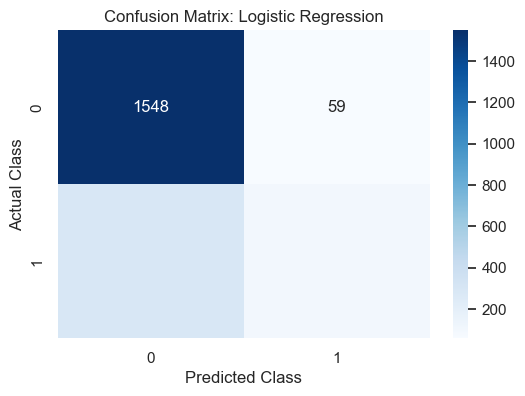

Training Decision Tree...
Evaluating Decision Tree...
Accuracy: 0.7935
Precision: 0.4764
Recall: 0.5140
F1 Score: 0.4945


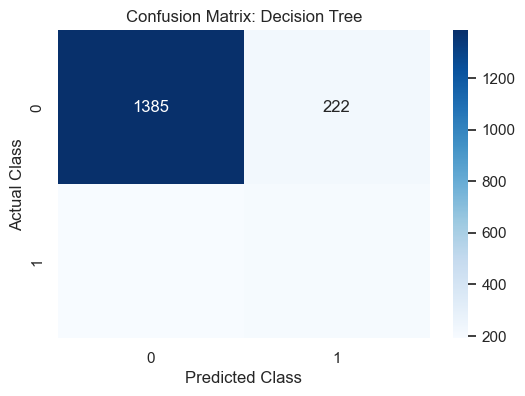

Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.8670
Precision: 0.7510
Recall: 0.4835
F1 Score: 0.5882


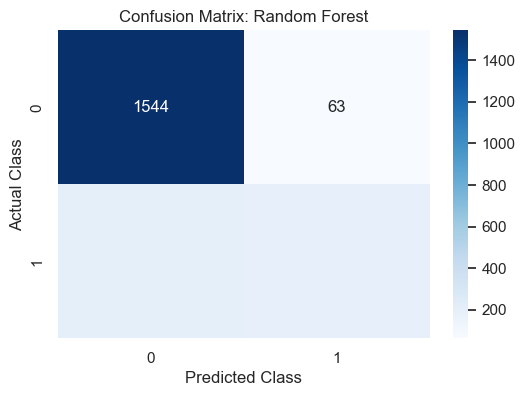

Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy: 0.8390
Precision: 0.6564
Recall: 0.3791
F1 Score: 0.4806


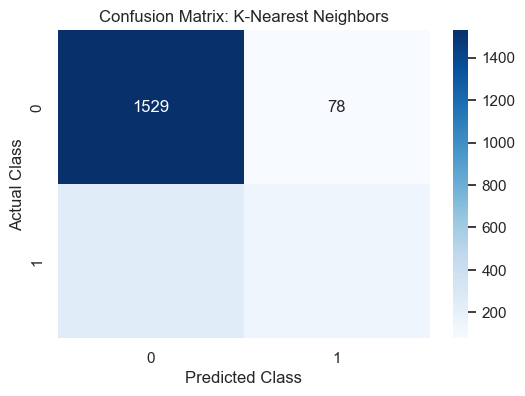

Training Support Vector Machine...
Evaluating Support Vector Machine...
Accuracy: 0.8425
Precision: 0.8900
Recall: 0.2265
F1 Score: 0.3611


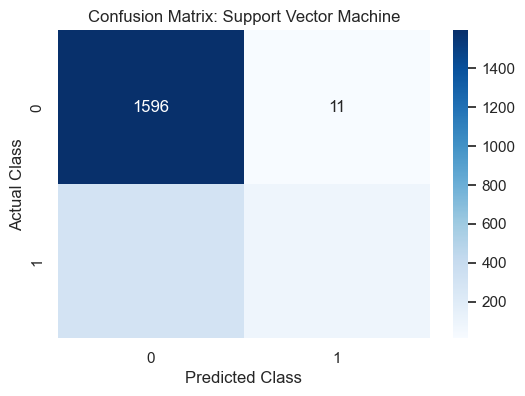

Training XGBoost...
Evaluating XGBoost...
Accuracy: 0.8595
Precision: 0.6905
Recall: 0.5165
F1 Score: 0.5910


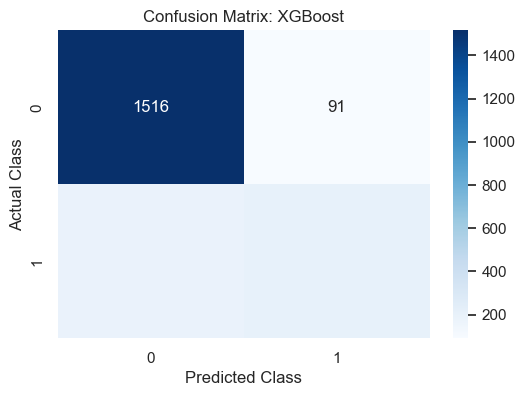

Training Multilayer Perceptron (MLP)...
Evaluating Multilayer Perceptron (MLP)...
Accuracy: 0.8660
Precision: 0.7133
Recall: 0.5318
F1 Score: 0.6093


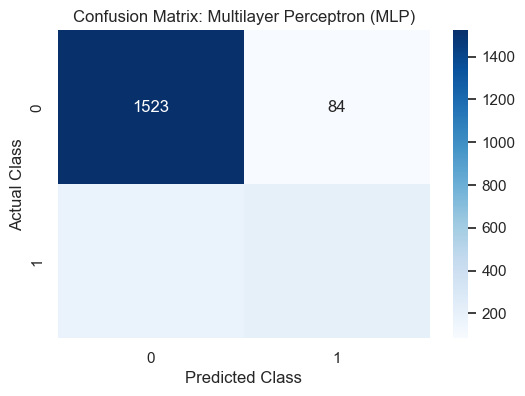

Training Naive Bayes...
Evaluating Naive Bayes...
Accuracy: 0.8065
Precision: 0.5094
Recall: 0.4122
F1 Score: 0.4557


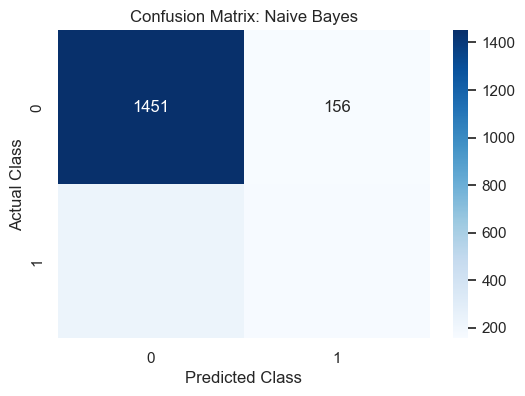

                             Accuracy  Precision    Recall  F1 Score
Logistic Regression            0.8245   0.631250  0.256997  0.365280
Decision Tree                  0.7935   0.476415  0.513995  0.494492
Random Forest                  0.8670   0.750988  0.483461  0.588235
K-Nearest Neighbors            0.8390   0.656388  0.379135  0.480645
Support Vector Machine         0.8425   0.890000  0.226463  0.361055
XGBoost                        0.8595   0.690476  0.516539  0.590975
Multilayer Perceptron (MLP)    0.8660   0.713311  0.531807  0.609329
Naive Bayes                    0.8065   0.509434  0.412214  0.455696


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Multilayer Perceptron (MLP)": MLPClassifier(max_iter=500),
    "Naive Bayes": GaussianNB()
}

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return accuracy, precision, recall, f1

# Dictionary to store evaluation results
evaluation_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    print(f"Evaluating {model_name}...")
    acc, prec, rec, f1 = evaluate_model(model, X_test, y_test)
    
    # Store results
    evaluation_results[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    # Confusion Matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

# Display final evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train = X_train.to_numpy()  # This converts the DataFrame to a NumPy array
X_test = X_test.to_numpy()    # Convert the test set to NumPy array

# Reshape the data for LSTM: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert labels to categorical (for classification)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=60, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_categorical)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict class labels on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the LSTM model with classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7770 - loss: 0.5254 - val_accuracy: 0.8019 - val_loss: 0.4181
Epoch 2/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8046 - loss: 0.4317 - val_accuracy: 0.8313 - val_loss: 0.4040
Epoch 3/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8161 - loss: 0.4359 - val_accuracy: 0.8481 - val_loss: 0.3956
Epoch 4/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8383 - loss: 0.3957 - val_accuracy: 0.8456 - val_loss: 0.3866
Epoch 5/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8341 - loss: 0.4079 - val_accuracy: 0.8425 - val_loss: 0.3834
Epoch 6/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8420 - loss: 0.3864 - val_accuracy: 0.8494 - val_loss: 0.3770
Epoch 7/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8452 - loss: 0.3841 - val_accuracy: 0.8487 - val_loss: 0.3689
Epoch 8/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8474 - loss: 0.3762 - val_accuracy: 0.

#### Model Evaluation

The best trained model was for to evaluate our test data was selected. The best regression model(XGBoost Regressor) for this project was select based on
its Mean Square Error: 324035627834.29736 &  R2 Score: 0.738. The model achieved the least MSE and highest R2 score making it the best trained regression model2

In [53]:
import joblib
import os

# Define the path for saving the MLP model
save_directory = 'C:\\Users\\``Emmanuel Oguntomi\\Desktop\Bank_churn_models'
os.makedirs(save_directory, exist_ok=True)  # Ensure the directory exists

# Inside your model training loop
if model_name == "Multilayer Perceptron (MLP)":
    mlp_model_path = os.path.join(save_directory, 'mlp_model_2.pkl')  # Add a filename
    joblib.dump(model, mlp_model_path)
    print(f"MLP model saved at {mlp_model_path}")
